In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas.plotting import scatter_matrix

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from pandas_profiling import ProfileReport

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import QuantileTransformer

In [6]:
from sklearn.datasets import load_boston

In [7]:
bostondata=load_boston().data
bostontarget=load_boston().target

In [8]:
load_boston().keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [9]:
# Reading the description
print(load_boston().DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [10]:
boston=pd.DataFrame(data=bostondata, columns=load_boston().feature_names)

In [11]:
boston['MEDV']=bostontarget

In [12]:
boston.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [13]:
Rpt=ProfileReport(boston)

In [14]:
Rpt.to_file("DEscriptive stat for boston dataset.html")

In [15]:
boston.isnull().sum().sum() # No missing values

0

In [16]:
boston[boston.duplicated()] # No duplicates

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


In [17]:
boston.select_dtypes(exclude='object').head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


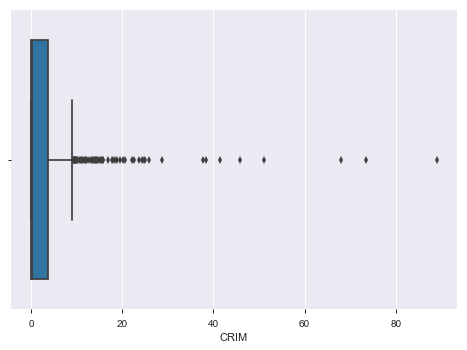

In [18]:
sns.boxplot(boston['CRIM'])

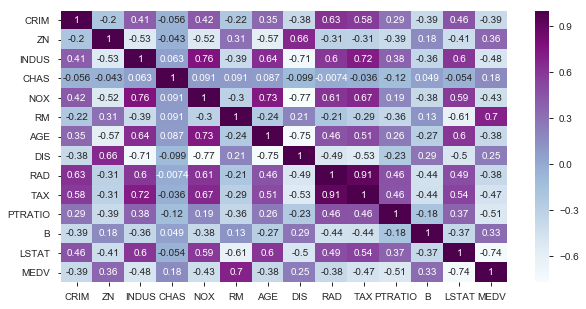

In [19]:
plt.figure(figsize=(10,5))
sns.heatmap(boston.corr(), cmap='BuPu', annot=True)

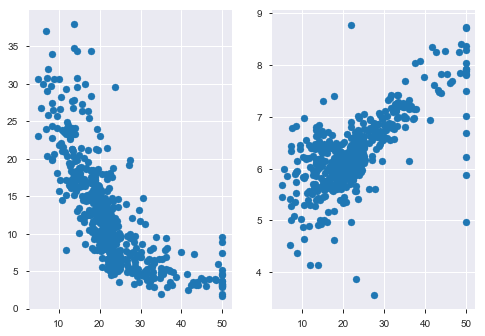

In [20]:
#TAX and RAD are very closely related
#MEDV is related with LSTAT and RM
plt.subplot(121)
plt.scatter(boston['MEDV'],boston['LSTAT'])
plt.subplot(122)
plt.scatter(boston['MEDV'],boston['RM'])

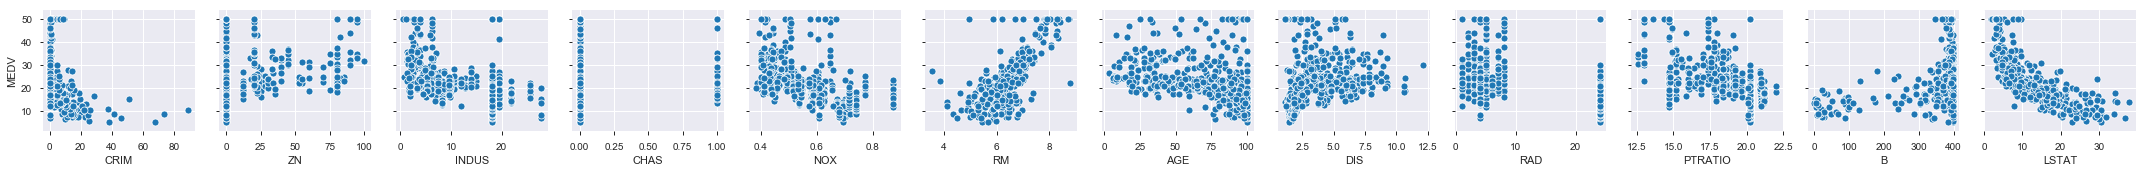

In [21]:
feature_cols=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','PTRATIO', 'B', 'LSTAT']# TAX not included
sns.pairplot(data=boston,
            x_vars=feature_cols,
            y_vars='MEDV',
            diag_kind='kde')

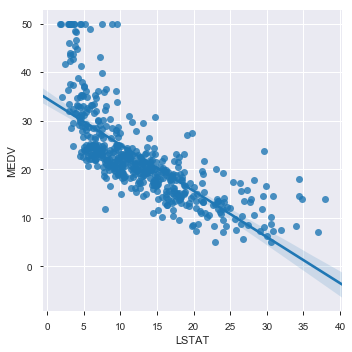

In [22]:
#plt.subplot(121)
sns.lmplot(x='LSTAT',y='MEDV',data=boston)

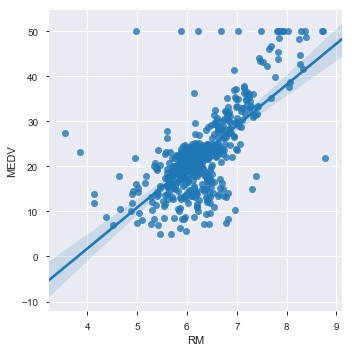

In [23]:
sns.lmplot(x='RM',y='MEDV',data=boston)

In [24]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [25]:
# Feature selection
import statsmodels.api as sm
feature_cols=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','PTRATIO', 'B', 'LSTAT']# TAX not included
x=boston[feature_cols]
y=boston['MEDV']
x=sm.add_constant(x)
model1=sm.OLS(y,x).fit()

In [26]:
model1.summary() #'CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD','PTRATIO', 'B', 'LSTAT' are the features selected

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     113.9
Date:                Thu, 17 Oct 2019   Prob (F-statistic):          1.21e-133
Time:                        18:48:41   Log-Likelihood:                -1504.3
No. Observations:                 506   AIC:                             3035.
Df Residuals:                     493   BIC:                             3089.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.6286      5.123      6.760      0.000      24.563      44.694
CRIM          -0.1067      0.033     -3.216      0.001      -0.172      -0.042
ZN             0.0364      0.014      2.692      0.007       0.010       0.063
INDUS         -0.0678      0.056     -1.214      0.225      -0.177       0.042
CHAS           3.0292      0.864      3.507      0.000       1.332       4.726
NOX          -18.7012      3.847     -4.862      0.000     -26.259     -11.143
RM             3.9117      0.421      9.294      0.000       3.085       4.739
AGE           -0.0006      0.013     -0.045      0.964      -0.027       0.026
DIS           -1.4883      0.201     -7.390      0.000      -1.884      -1.093
RAD            0.1346      0.041      3.262      0.001       0.054       0.216
PTRATIO       -0.9851      0.132     -7.478      0.000      -1.244      -0.726
B              0.0095      0.003      3.521      0.000       0.004       0.015
LSTAT         -0.5222      0.051    -10.198      0.000      -0.623      -0.422
==============================================================================
Omnibus:                      168.699   Durbin-Watson:                   1.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              702.173
Skew:                           1.452   Prob(JB):                    3.35e-153
Kurtosis:                       7.987   Cond. No.                     1.01e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
model1.pvalues[model1.pvalues <0.05]

const      3.917753e-11
CRIM       1.384320e-03
ZN         7.353915e-03
CHAS       4.937663e-04
NOX        1.566976e-06
RM         4.782220e-19
DIS        6.310048e-13
RAD        1.182260e-03
PTRATIO    3.481822e-13
B          4.702128e-04
LSTAT      2.761703e-22
dtype: float64

In [28]:
feature_cols=['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD','PTRATIO', 'B', 'LSTAT']# TAX not included
x=boston[feature_cols]
y=boston['MEDV']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((354, 10), (152, 10), (354,), (152,))

In [29]:
linereg1=LinearRegression()
linereg1.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
list(zip(feature_cols,linereg1.coef_))

[('CRIM', -0.09548090439852754),
 ('ZN', 0.047445824415551174),
 ('CHAS', 2.7907269919625453),
 ('NOX', -22.57728752241126),
 ('RM', 2.8723846553409436),
 ('DIS', -1.4742472488294707),
 ('RAD', 0.1469849800563346),
 ('PTRATIO', -1.062229158933343),
 ('B', 0.006621069813485718),
 ('LSTAT', -0.5624460725028292)]

In [31]:
linereg1.intercept_

45.24092887099671

In [32]:
y_pred=linereg1.predict(x_test)

In [33]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import adjusted_rand_score

In [34]:
print('r2 score',r2_score(y_test,y_pred))
#print('Adjusted r2 score', adjusted_rand_score(y_test,y_pred))
print('Mean_absolute_error, MAE',mean_absolute_error(y_test,y_pred))
print('Mean_squared_error, MSE',mean_squared_error(y_test,y_pred))
print('Root Mean squared error, RMSE', np.sqrt(mean_squared_error(y_test,y_pred)))
print('SSR',sum(y_pred-y_test)**2)
print('SST', sum((y_test-np.mean(y_test))**2))
SSR,SST=sum(y_pred-y_test)**2, sum((y_test-np.mean(y_test))**2)
r2_score_calculated=1-(float(SSR)/SST)
print("r2_score_calculated",r2_score_calculated)

r2 score 0.7733199823935053
Mean_absolute_error, MAE 3.4265327426903336
Mean_squared_error, MSE 20.776240749950386
Root Mean squared error, RMSE 4.558096176031215
SSR 1377.5058638495393
SST 13931.482039473687
r2_score_calculated 0.9011228051727381


In [35]:
from statsmodels.tools.eval_measures import rmse
print(rmse(y_test,y_pred))

4.558096176031215


In [36]:
residuals=y_test-y_pred


# Normality test for residuals

(array([10., 26., 26., 48., 17., 11.,  5.,  4.,  3.,  2.]),
 array([-8.36693492, -5.98450514, -3.60207536, -1.21964558,  1.1627842 ,
         3.54521398,  5.92764376,  8.31007354, 10.69250332, 13.0749331 ,
        15.45736288]),
 <a list of 10 Patch objects>)

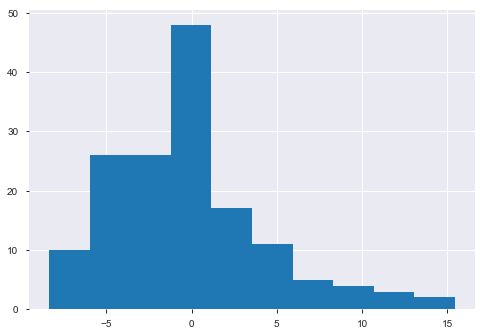

In [37]:
plt.hist(residuals) # residuals not normally distributed

In [38]:
from scipy.stats import shapiro
# normality test
stat, p = shapiro(residuals)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.943, p=0.000
Sample does not look Gaussian (reject H0)


Wall time: 250 ms


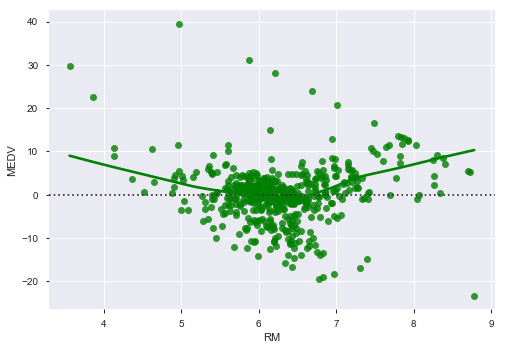

In [39]:
%%time
sns.residplot(data=boston,x='RM',y= 'MEDV',lowess=True, color="g") # residuals are not homoscadestic

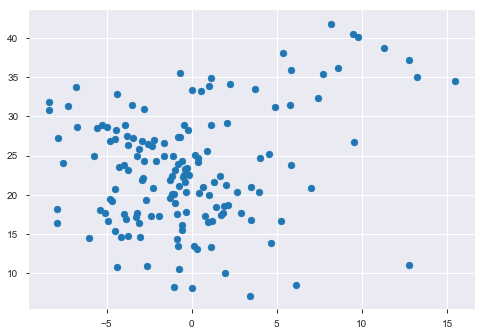

In [40]:
plt.scatter(residuals,y_pred)

In [41]:
import statsmodels
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']

bp = statsmodels.stats.diagnostic.het_breuschpagan(model1.resid, model1.model.exog)
bp

(62.25429691507084,
 8.735671613767896e-09,
 5.763693065225364,
 2.3276218666439865e-09)

In [42]:
residuals.corr()

TypeError: corr() missing 1 required positional argument: 'other'

In [46]:
from yellowbrick.regressor import ResidualsPlot

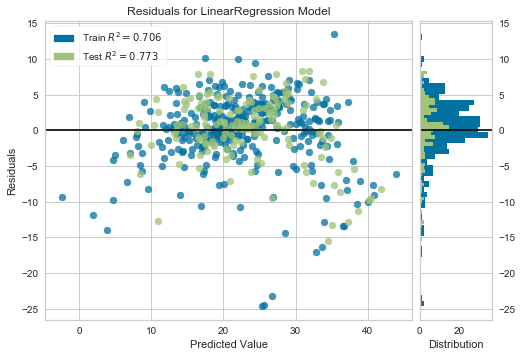

In [51]:
visualizer=ResidualsPlot(linereg1)
visualizer.fit(x_train,y_train)
visualizer.score(x_test,y_test)
g=visualizer.poof()

In [52]:
#The linear regression model explains only 77% of the variance in the response variable.About 23% variance still remains the model.
# Also LSTAT has a slight non linear realtion with the response var.
# Residuals are not normally distributed, not have homoscadeasticity, statistically independent
# Polynomial regression needs to be tried out

In [53]:
from sklearn.preprocessing import PolynomialFeatures

In [54]:
degree=2
poly2=PolynomialFeatures(degree=2)
x_train_poly2=poly2.fit_transform(x_train) # x_train is converted into higher degree polynomial

In [55]:
poly_model1= LinearRegression()
poly_model1.fit(x_train_poly2,y_train)

y_pred_poly2 = poly_model1.predict(poly2.fit_transform(x_test))

print('r2 score',r2_score(y_test,y_pred_poly2))
#print('Adjusted r2 score', adjusted_rand_score(y_test,y_pred))
print('Mean_absolute_error, MAE',mean_absolute_error(y_test,y_pred_poly2))
print('Mean_squared_error, MSE',mean_squared_error(y_test,y_pred_poly2))
print('Root Mean squared error, RMSE', np.sqrt(mean_squared_error(y_test,y_pred_poly2)))


r2 score 0.8143374375946398
Mean_absolute_error, MAE 2.8816033452161514
Mean_squared_error, MSE 17.01680693126932
Root Mean squared error, RMSE 4.125143261908526


In [56]:
degree=3
poly3=PolynomialFeatures(degree=3)
x_train_poly3=poly3.fit_transform(x_train)


In [57]:
poly_model3= LinearRegression()
poly_model3.fit(x_train_poly3,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [58]:

y_pred_poly3 = poly_model3.predict(poly3.fit_transform(x_test))

print('r2 score',r2_score(y_test,y_pred_poly3))
print('Mean_absolute_error, MAE',mean_absolute_error(y_test,y_pred_poly3))
print('Mean_squared_error, MSE',mean_squared_error(y_test,y_pred_poly3))
print('Root Mean squared error, RMSE', np.sqrt(mean_squared_error(y_test,y_pred_poly3)))

r2 score -2.277655427091312
Mean_absolute_error, MAE 7.484283092404885
Mean_squared_error, MSE 300.4118270664872
Root Mean squared error, RMSE 17.332392421892806


In [59]:
# 2nd degree polynomial provides a better r2 score
residual_poly=y_test-y_pred_poly2

(array([ 1.,  0.,  1.,  0.,  4.,  9., 47., 56., 29.,  5.]),
 array([-24.46509425, -21.13353988, -17.8019855 , -14.47043113,
        -11.13887676,  -7.80732238,  -4.47576801,  -1.14421363,
          2.18734074,   5.51889511,   8.85044949]),
 <a list of 10 Patch objects>)

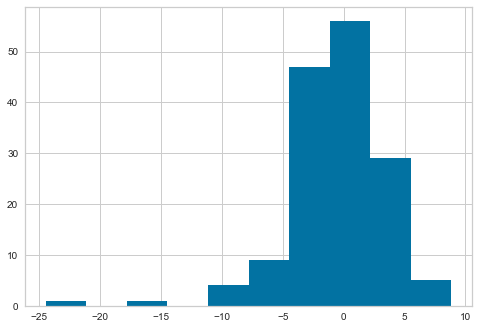

In [60]:
plt.hist(residual_poly)

In [61]:
stat,p=shapiro(residual_poly)
stat,p # Not normally disrtributed

(0.9029160141944885, 1.6382884382437624e-08)

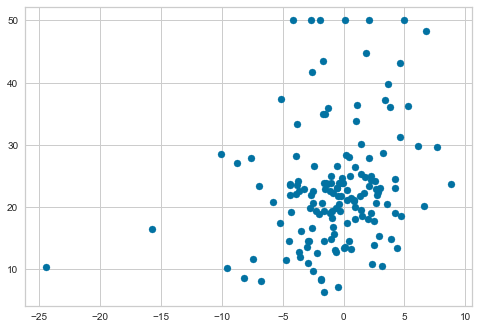

In [62]:
plt.scatter(residual_poly, y_test)

# Ridge Regression

In [63]:
from sklearn.linear_model import Ridge

In [64]:
ridgemodel=Ridge()

In [65]:
ridgemodel.fit(x_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [66]:
ridgemodel.intercept_, ridgemodel.coef_

(36.9522182943061,
 array([-8.30212074e-02,  4.87261819e-02,  2.57572880e+00, -1.30618373e+01,
         2.97779224e+00, -1.20326342e+00,  1.00699772e-01, -9.63564893e-01,
         7.44176598e-03, -5.93313578e-01]))

In [67]:
y_ridgepredict=ridgemodel.predict(x_test)

In [68]:
print('r2 score',r2_score(y_test,y_ridgepredict))
print('Mean_absolute_error, MAE',mean_absolute_error(y_test,y_ridgepredict))
print('Mean_squared_error, MSE',mean_squared_error(y_test,y_ridgepredict))
print('Root Mean squared error, RMSE', np.sqrt(mean_squared_error(y_test,y_ridgepredict)))

r2 score 0.7755863554967138
Mean_absolute_error, MAE 3.3646640900139735
Mean_squared_error, MSE 20.568517485594494
Root Mean squared error, RMSE 4.535252747708169


# Lasso Regression

In [69]:
from sklearn.linear_model import Lasso

In [70]:
lassomodel=Lasso().fit(x_train,y_train)
lassomodel.intercept_, lassomodel.coef_

(44.30207193733931,
 array([-0.04565083,  0.04299233,  0.        , -0.        ,  0.24823023,
        -0.50921742,  0.04168261, -0.78945731,  0.00666241, -0.77921576]))

In [71]:
for col, coef in list(zip(feature_cols,lassomodel.coef_)):
    print('column name {} has coefficent, {}'.format(col, coef))
    # CHAS and NOX coef is shrinked to zero. so those features are not relevant
    

column name CRIM has coefficent, -0.04565082550724265
column name ZN has coefficent, 0.04299232563162528
column name CHAS has coefficent, 0.0
column name NOX has coefficent, -0.0
column name RM has coefficent, 0.24823023159263666
column name DIS has coefficent, -0.5092174227491241
column name RAD has coefficent, 0.04168260973641079
column name PTRATIO has coefficent, -0.7894573059260055
column name B has coefficent, 0.0066624124435545875
column name LSTAT has coefficent, -0.7792157580923124


In [72]:
y_lassopredict=lassomodel.predict(x_test)

print('r2 score',r2_score(y_test,y_lassopredict))
print('Mean_absolute_error, MAE',mean_absolute_error(y_test,y_lassopredict))
print('Mean_squared_error, MSE',mean_squared_error(y_test,y_lassopredict))
print('Root Mean squared error, RMSE', np.sqrt(mean_squared_error(y_test,y_lassopredict)))

r2 score 0.6468250577734225
Mean_absolute_error, MAE 4.056816684282576
Mean_squared_error, MSE 32.37006818698501
Root Mean squared error, RMSE 5.689469939017607


# Elasticnet Regression

In [88]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [93]:
elasticmodel=ElasticNet(normalize=True)

search=GridSearchCV(estimator=elasticmodel,
                   param_grid={'alpha':np.logspace(-5,3,8),
                               'l1_ratio':[.2,.4,.6,.8]},
                   scoring='neg_mean_squared_error',
                    n_jobs=1,
                    refit=True,
                    cv=10)

search.fit(x_train,y_train)
search.best_params_

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'alpha': 0.00013894954943731373, 'l1_ratio': 0.6}

In [94]:
elasticmodel=ElasticNet(alpha=0.0001389495494373137,l1_ratio=0.6).fit(x_train, y_train)
elasticmodel.intercept_, elasticmodel.coef_

(44.941672727874476,
 array([-9.50291470e-02,  4.74895862e-02,  2.78332778e+00, -2.22364209e+01,
         2.87639739e+00, -1.46450219e+00,  1.45319446e-01, -1.05866606e+00,
         6.65051318e-03, -5.63535292e-01]))

In [95]:
for col, coef in list(zip(feature_cols,elasticmodel.coef_)):
    print('column name {} has coefficent, {}'.format(col, coef))
    # CHAS and NOX coef is shrinked to zero. so those features are not relevant

column name CRIM has coefficent, -0.09502914703495026
column name ZN has coefficent, 0.04748958624107877
column name CHAS has coefficent, 2.7833277837115817
column name NOX has coefficent, -22.236420877488904
column name RM has coefficent, 2.8763973874823465
column name DIS has coefficent, -1.4645021937734342
column name RAD has coefficent, 0.145319446475569
column name PTRATIO has coefficent, -1.0586660623701627
column name B has coefficent, 0.006650513183896949
column name LSTAT has coefficent, -0.5635352921306199


In [96]:
y_elasticpredict=elasticmodel.predict(x_test)

print('r2 score',r2_score(y_test,y_elasticpredict))
print('Mean_absolute_error, MAE',mean_absolute_error(y_test,y_elasticpredict))
print('Mean_squared_error, MSE',mean_squared_error(y_test,y_elasticpredict))
print('Root Mean squared error, RMSE', np.sqrt(mean_squared_error(y_test,y_elasticpredict)))

r2 score 0.7735260817916145
Mean_absolute_error, MAE 3.4234618560302166
Mean_squared_error, MSE 20.7573508153247
Root Mean squared error, RMSE 4.556023574930742


In [77]:
'''
# Linear Regression 
R2 score 0.7733199823935053
Mean_absolute_error, MAE 3.4265327426903336
Mean_squared_error, MSE 20.776240749950386
Root Mean squared error, RMSE 4.558096176031215

# Polynomial regression
R2 score -2.277655427091312
Mean_absolute_error, MAE 7.484283092404885
Mean_squared_error, MSE 300.4118270664872
Root Mean squared error, RMSE 17.332392421892806

# Ridge regression
R2 score 0.7755863554967138
Mean_absolute_error, MAE 3.3646640900139735
Mean_squared_error, MSE 20.568517485594494
Root Mean squared error, RMSE 4.535252747708169

# Lasso regression
R2 score 0.6468250577734225
Mean_absolute_error, MAE 4.056816684282576
Mean_squared_error, MSE 32.37006818698501
Root Mean squared error, RMSE 5.689469939017607

# Elasticnet regression
r2 score 0.7735260817916145
Mean_absolute_error, MAE 3.4234618560302166
Mean_squared_error, MSE 20.7573508153247
Root Mean squared error, RMSE 4.556023574930742

'''

'\n# Linear Regression \nR2 score 0.7733199823935053\nMean_absolute_error, MAE 3.4265327426903336\nMean_squared_error, MSE 20.776240749950386\nRoot Mean squared error, RMSE 4.558096176031215\n\n# Polynomial regression\nR2 score -2.277655427091312\nMean_absolute_error, MAE 7.484283092404885\nMean_squared_error, MSE 300.4118270664872\nRoot Mean squared error, RMSE 17.332392421892806\n\n# Ridge regression\nR2 score 0.7755863554967138\nMean_absolute_error, MAE 3.3646640900139735\nMean_squared_error, MSE 20.568517485594494\nRoot Mean squared error, RMSE 4.535252747708169\n\n# Lasso regression\nR2 score 0.6468250577734225\nMean_absolute_error, MAE 4.056816684282576\nMean_squared_error, MSE 32.37006818698501\nRoot Mean squared error, RMSE 5.689469939017607\n\n# Elasticnet regression\nR2 score 0.6713840219145266\nMean_absolute_error, MAE 3.9290747150718617\nMean_squared_error, MSE 30.1191289248806\nRoot Mean squared error, RMSE 5.488089733676063\n'

In [78]:
# Ridge regression is found to be a better choice 

In [79]:
# RidgeCv is used to tune the alpha parameter
from sklearn.linear_model import RidgeCV

In [80]:
ridgecv=RidgeCV(
    alphas=np.linspace(0.02,10,1),
    fit_intercept=True,
    normalize=False,
    scoring='neg_mean_squared_error'
    )

ridgecv.fit(x_train, y_train)

ridgecv.alphas

array([0.02])

In [81]:
ridgemodel1=Ridge(alpha=0.08).fit(x_train,y_train)

y_ridgepred1=ridgemodel1.predict(x_test)

print('r2 score',r2_score(y_test,y_ridgepred1))
print('Mean_absolute_error, MAE',mean_absolute_error(y_test,y_ridgepred1))
print('Mean_squared_error, MSE',mean_squared_error(y_test,y_ridgepred1))
print('Root Mean squared error, RMSE', np.sqrt(mean_squared_error(y_test,y_ridgepred1)))

# Ridgemodel with an alpha tuned to 0.08 provides the least MSE

r2 score 0.7740483259320725
Mean_absolute_error, MAE 3.4152328574980118
Mean_squared_error, MSE 20.709484796489104
Root Mean squared error, RMSE 4.550767495323081


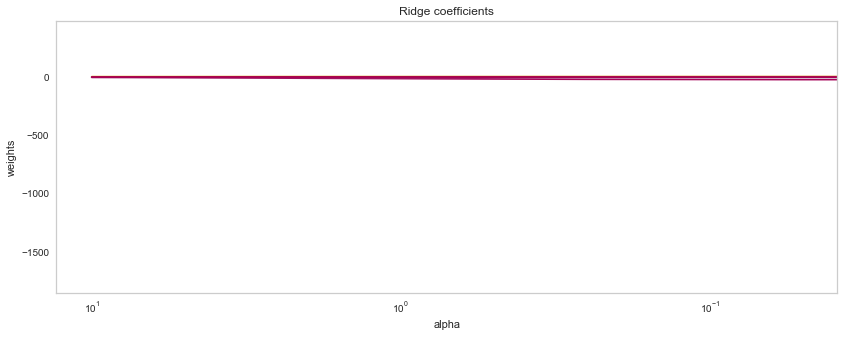

In [84]:
plt.figure(figsize=(14, 5))
plt.grid()

ax = plt.gca()

ax.plot(alphas, coef)

ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis

plt.xlabel('alpha')
plt.ylabel('weights')

plt.title('Ridge coefficients');

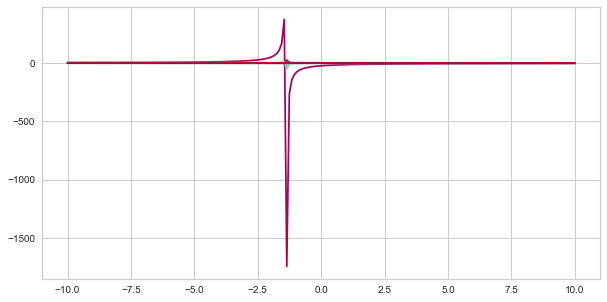

In [85]:
plt.figure(figsize=(10,5))
#ax=plt.grid()
#ax=plt.gca()
plt.plot(alphas,coef)

In [86]:
from yellowbrick.regressor import AlphaSelection
visualizer=AlphaSelection(ridgecv)
visualizer.fit(x_train,y_train)

YellowbrickValueError: could not find errors param on RidgeCV estimator